## Real_Estate_Detroit

In [1]:

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# parcel data filtered for "sale date" within 2017

ParcelData17 = pd.read_csv('sales2017hood1.csv')

# parcel data filtered for "sale date" within 2013

ParcelData13= pd.read_csv('sales2013hood1.csv')


In [3]:
print ('2017 shape', ParcelData17.shape)
print ('2013 shape', ParcelData13.shape)

2017 shape (8689, 52)
2013 shape (10738, 52)


In [4]:
ParcelData17.columns

Index(['Parcel Number', 'Address', 'Zip Code', 'Council District',
       'Taxable Status', 'Owner', 'Owner 2', 'Taxpayer',
       'Owner Street Address', 'Owner City', 'Owner State', 'Owner Zip Code',
       'Zoning', 'Owner Country', 'SaleDate', 'Last Sale Price',
       'Last Terms of Sale', 'Land Value', 'Taxable Value', 'Improved Value',
       'State Equalized Value', 'Property Class', 'Total Acreage', 'Frontage',
       'Principal Residence Exemption', 'NEZ', 'Depth', 'SqFt', 'Floor Area',
       'Year Built', 'Building Style', 'Number of Buildings', 'Ward',
       'LandMap', 'Related Parcel', 'Longitude', 'Latitude',
       'Legal Description', 'Location', 'acres', 'shape_area', 'join_count',
       'district_nu', 'objectid_1', 'nhood_num', 'objectid', 'shape_leng',
       'nhood_name', 'new_nhood', 'neighborho', 'target_fid', 'shape_le_1'],
      dtype='object')

In [5]:
ParcelData17.head()

,Parcel Number,Address,Zip Code,Council District,Taxable Status,Owner,Owner 2,Taxpayer,Owner Street Address,Owner City,...,district_nu,objectid_1,nhood_num,objectid,shape_leng,nhood_name,new_nhood,neighborho,target_fid,shape_le_1
0,13000457.003,531 MCDOUGALL 101,NaN,5,NaN,"OSERIN, ISAAC",NaN,NaN,250 CABRINI BLVD #4A,NEW YORK,...,5,63,51,63,20176.186511,Elmwood Park,Elmwood Park,130,63,20176.186511
1,13000451.001,3122 E LAFAYETTE 37,NaN,5,NaN,RIVER PARK PLACE CONDOMINIUM ASSOC.,NaN,NaN,18222 LIVERNOIS,DETROIT,...,5,63,51,63,20176.186511,Elmwood Park,Elmwood Park,130,63,20176.186511
2,21052031.002,13323 ST ERVIN AVE 18,NaN,4,NaN,"JONES, MATLYNN",NaN,NaN,15813 CRUSE,DETROIT,...,4,4,97,4,25466.579569,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.579569
3,21052032.024,13111 ST ERVIN AVE 43,48215,4,NaN,"JONES, DESMOND",NaN,NaN,13111 ST ERVIN AVE,DETROIT,...,4,4,97,4,25466.579569,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.579569
4,15002016.,7454 ROLAND,48213,3,TAXABLE,"DEW. JR, JOE THOMAS",NaN,"DEW. JR, JOE THOMAS",7454 ROLAND ST,DETROIT,...,3,94,1,96,48720.860449,Airport Sub,Airport Sub,76,94,48720.860449


## Plot

In [6]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(ParcelData17.Longitude, ParcelData17.Latitude)]
ParcelData17 = ParcelData17.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}


In [7]:
gdf = gpd.GeoDataFrame(ParcelData17, crs=crs, geometry=geometry)

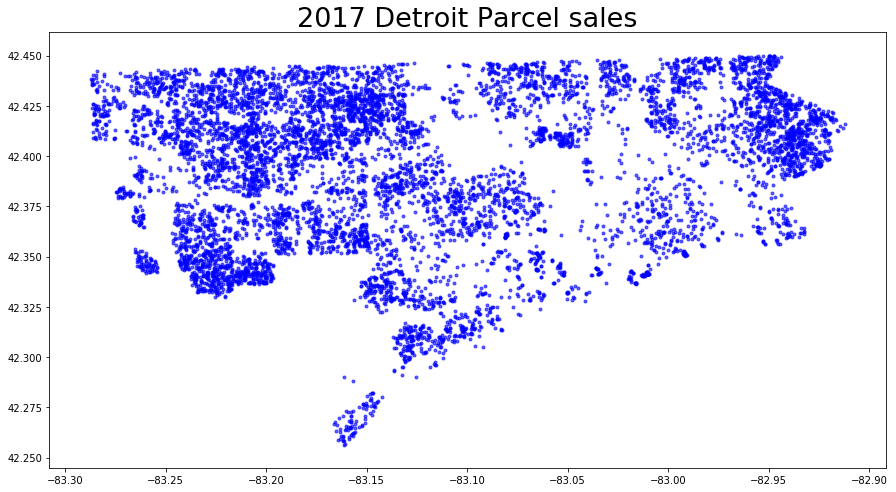

In [8]:
f, ax = plt.subplots(1,figsize = (15,16))
plt.title('2017 Detroit Parcel sales',  fontsize=27)
gdf.plot(c='b',marker='.',ax=ax, alpha=0.6)
plt.show()

In [9]:
geometry = [Point(xy) for xy in zip(ParcelData13.Longitude, ParcelData13.Latitude)]
ParcelData13 = ParcelData13.drop(['Longitude', 'Latitude'], axis=1)
crs = {'init': 'epsg:4326'}

In [10]:
gdf = gpd.GeoDataFrame(ParcelData13, crs=crs, geometry=geometry)

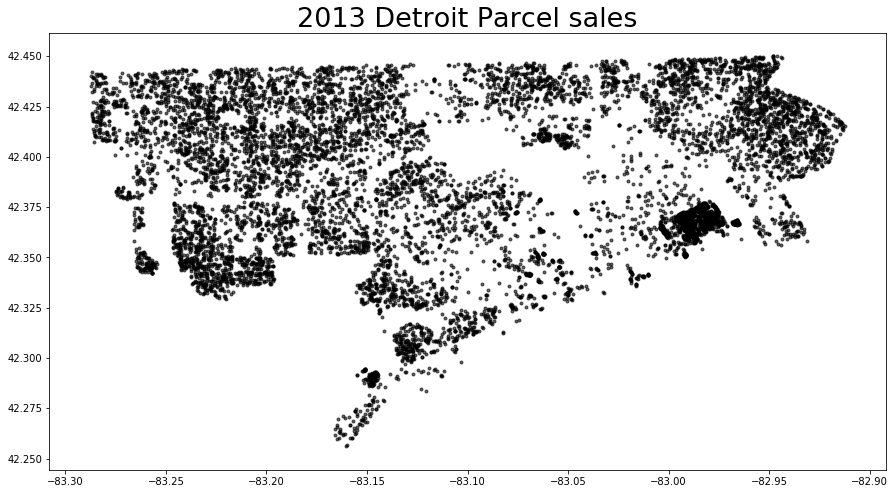

In [11]:
f, ax = plt.subplots(1,figsize = (15,16))
plt.title('2013 Detroit Parcel sales',  fontsize=27)
gdf.plot(c='k',marker='.',ax=ax, alpha=0.6)
plt.show()

## Group.by Neighborhoods mean sales

In [12]:
#2017 data

In [13]:
ParcelData17.head(5)

,Parcel Number,Address,Zip Code,Council District,Taxable Status,Owner,Owner 2,Taxpayer,Owner Street Address,Owner City,...,objectid_1,nhood_num,objectid,shape_leng,nhood_name,new_nhood,neighborho,target_fid,shape_le_1,geometry
0,13000457.003,531 MCDOUGALL 101,NaN,5,NaN,"OSERIN, ISAAC",NaN,NaN,250 CABRINI BLVD #4A,NEW YORK,...,63,51,63,20176.186511,Elmwood Park,Elmwood Park,130,63,20176.186511,POINT (-83.0183 42.34285)
1,13000451.001,3122 E LAFAYETTE 37,NaN,5,NaN,RIVER PARK PLACE CONDOMINIUM ASSOC.,NaN,NaN,18222 LIVERNOIS,DETROIT,...,63,51,63,20176.186511,Elmwood Park,Elmwood Park,130,63,20176.186511,POINT (-83.01879 42.34238)
2,21052031.002,13323 ST ERVIN AVE 18,NaN,4,NaN,"JONES, MATLYNN",NaN,NaN,15813 CRUSE,DETROIT,...,4,97,4,25466.579569,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.579569,POINT (-82.94883 42.36918)
3,21052032.024,13111 ST ERVIN AVE 43,48215,4,NaN,"JONES, DESMOND",NaN,NaN,13111 ST ERVIN AVE,DETROIT,...,4,97,4,25466.579569,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.579569,POINT (-82.94821999999999 42.36823)
4,15002016.,7454 ROLAND,48213,3,TAXABLE,"DEW. JR, JOE THOMAS",NaN,"DEW. JR, JOE THOMAS",7454 ROLAND ST,DETROIT,...,94,1,96,48720.860449,Airport Sub,Airport Sub,76,94,48720.860449,POINT (-83.02345 42.39662)


In [14]:
ParcelData17.new_nhood.unique()

array(['Elmwood Park', 'Jefferson Chalmers', 'Airport Sub', 'Nortown',
       'Sherwood', 'Denby', 'Morningside', 'East English Village',
       'Cornerstone Village', 'Warren Ave Community', 'Paveway',
       'Eliza Howell', 'Bethune Community', 'Joy-Schaefer',
       'Schaefer 7/8 Lodge', 'Plymouth-Hubbell', 'Belmont',
       'Dexter-Linwood', 'College Park', 'Crary/St Marys',
       'Oakman Blvd Community', 'Schulze', 'Bagley', 'Central Southwest',
       'Claytown', 'Midwest', 'Fitzgerald/Marygrove',
       'LaSalle College Park', 'Warrendale', 'Schoolcraft Southfield',
       'Littlefield Community', 'Pembroke', 'McDowell', 'Indian Village',
       'Grand River-I96', 'Michigan-Martin', 'Miller Grove',
       'Far West Detroit', 'Barton-McFarland', 'Southfield Plymouth',
       'Springwells', 'NW Goldberg', 'Boynton', 'Farwell', 'Mapleridge',
       'Regent Park', 'North Corktown', 'Von Steuben', 'Eden Gardens',
       'Moross-Morang', "O'Hair Park", 'Oak Grove', 'Harmony Village',

In [15]:
#2017 
ParcelData17Group = ParcelData17.groupby(['new_nhood']).mean()

In [16]:
ParcelData17Group = ParcelData17Group.round()

In [17]:
# 2013 data

In [18]:
ParcelData13.head(5)

,Parcel Number,Address,Zip Code,Council District,Taxable Status,Owner,Owner 2,Taxpayer,Owner Street Address,Owner City,...,objectid_1,nhood_num,objectid,shape_leng,nhood_name,new_nhood,neighborho,target_fid,shape_le_1,geometry
0,13000447.009,707 MCDOUGALL 9,NaN,5,NaN,"JOHNSON, MATTHEW",NaN,NaN,707 MCDOUGALL,DETROIT,...,63,51,63,20176.186511,Elmwood Park,Elmwood Park,130,63,20176.186511,POINT (-83.0193 42.3432)
1,13000116.163,250 E HARBORTOWN DR 160,NaN,5,NaN,PENSCO TRUST COMPANY FBO,NaN,NaN,12038 N LAKE ST,BITELY,...,26,163,26,23478.968618,Rivertown,Rivertown,129,26,23478.968618,POINT (-83.01017 42.3411)
2,21052033.,745 PIPER,48215,4,NaN,HERITAGE AT RIVERBEND CONDO ASSO.,NaN,NaN,13219 ST. ERVIN AVE.,DETROIT,...,4,97,4,25466.579569,Jefferson Chalmers,Jefferson Chalmers,101,4,25466.579569,POINT (-82.94734 42.3688)
3,13000453.007,610 ST MARON PL 63,NaN,5,NaN,"LI, NINGNING",NaN,NaN,69 THE FARTHINGS DERWENT WAY,NaN,...,63,51,63,20176.186511,Elmwood Park,Elmwood Park,130,63,20176.186511,POINT (-83.01829000000001 42.34163)
4,21040592.,2228 MONTCLAIR,48214,4,TAXABLE,HANTZ WOODLANDS LLC,NaN,HANTZ WOODLANDS LLC,"26200 AMERICAN DR., 5TH FLOOR",SOUTHFIELD,...,73,46,73,16953.151232,East Village,East Village,119,73,24323.244484,POINT (-82.97832 42.36909)


In [19]:
ParcelData13Group = ParcelData13.groupby(['new_nhood']).mean()

In [20]:
ParcelData13Group = ParcelData13Group.round()

In [21]:
ParcelData13Group

,Council District,Last Sale Price,Land Value,Taxable Value,Improved Value,State Equalized Value,Property Class,Total Acreage,Frontage,Principal Residence Exemption,...,shape_area,join_count,district_nu,objectid_1,nhood_num,objectid,shape_leng,neighborho,target_fid,shape_le_1
new_nhood,,,,,,,,,,,,,,,,,,,,,
Airport Sub,3.0,13773.0,3876.0,8353.0,21607.0,8353.0,364.0,0.0,37.0,33.0,...,131853308.0,3.0,3.0,94.0,1.0,96.0,48721.0,76.0,94.0,48721.0
Arden Park,5.0,50000.0,5608.0,3900.0,0.0,3900.0,401.0,0.0,100.0,0.0,...,2886593.0,1.0,5.0,58.0,2.0,58.0,7758.0,111.0,58.0,7758.0
Aviation Sub,7.0,36986.0,1300.0,13900.0,26022.0,13900.0,401.0,0.0,47.0,71.0,...,13096375.0,1.0,7.0,34.0,3.0,34.0,15225.0,200.0,34.0,15225.0
Bagley,2.0,32598.0,1368.0,21846.0,43436.0,21846.0,393.0,0.0,39.0,83.0,...,34751570.0,1.0,2.0,36.0,4.0,36.0,23757.0,58.0,36.0,23757.0
Barton-McFarland,7.0,32816.0,1428.0,12353.0,27985.0,12353.0,384.0,0.0,41.0,68.0,...,47235220.0,2.0,7.0,35.0,5.0,35.0,30717.0,199.0,35.0,30717.0
Belmont,1.0,26462.0,974.0,11148.0,21504.0,11148.0,401.0,0.0,39.0,57.0,...,6991608.0,1.0,1.0,71.0,7.0,71.0,11186.0,13.0,71.0,10571.0
Berg-Lahser,1.0,24887.0,1519.0,18204.0,34243.0,18204.0,401.0,0.0,56.0,69.0,...,16644000.0,1.0,1.0,10.0,9.0,10.0,18116.0,3.0,10.0,18116.0
Bethune Community,2.0,21725.0,1663.0,13157.0,26052.0,13157.0,386.0,0.0,41.0,58.0,...,40515105.0,3.0,2.0,204.0,91.0,189.0,17012.0,56.0,204.0,25559.0
Blackstone Park,2.0,23962.0,1159.0,10655.0,20368.0,10655.0,401.0,0.0,43.0,80.0,...,6631307.0,1.0,2.0,72.0,10.0,72.0,10311.0,37.0,72.0,10311.0


In [22]:
#Merge:

ParcelData17Group

,Council District,Last Sale Price,Land Value,Taxable Value,Improved Value,State Equalized Value,Property Class,Total Acreage,Frontage,Principal Residence Exemption,...,shape_area,join_count,district_nu,objectid_1,nhood_num,objectid,shape_leng,neighborho,target_fid,shape_le_1
new_nhood,,,,,,,,,,,,,,,,,,,,,
Airport Sub,4.0,28121.0,5779.0,16190.0,33645.0,16190.0,372.0,0.0,39.0,54.0,...,131853308.0,3.0,3.0,94.0,1.0,96.0,48721.0,76.0,94.0,48721.0
Arden Park,5.0,244500.0,5578.0,70900.0,132530.0,70900.0,401.0,0.0,105.0,50.0,...,2886593.0,1.0,5.0,58.0,2.0,58.0,7758.0,111.0,58.0,7758.0
Aviation Sub,7.0,41075.0,1317.0,14016.0,26247.0,14016.0,401.0,0.0,46.0,77.0,...,13096375.0,1.0,7.0,34.0,3.0,34.0,15225.0,200.0,34.0,15225.0
Bagley,2.0,58610.0,1212.0,21742.0,42470.0,21742.0,395.0,0.0,38.0,78.0,...,34751570.0,1.0,2.0,36.0,4.0,36.0,23757.0,58.0,36.0,23757.0
Barton-McFarland,7.0,32127.0,2931.0,14725.0,31276.0,14725.0,383.0,0.0,47.0,62.0,...,47235220.0,2.0,7.0,35.0,5.0,35.0,30717.0,199.0,35.0,30717.0
Belmont,1.0,27688.0,1043.0,12477.0,24039.0,12477.0,394.0,0.0,39.0,53.0,...,6991608.0,1.0,1.0,71.0,7.0,71.0,11186.0,13.0,71.0,10571.0
Berg-Lahser,1.0,49654.0,1968.0,21078.0,42161.0,21078.0,396.0,0.0,54.0,68.0,...,16644000.0,1.0,1.0,10.0,9.0,10.0,18116.0,3.0,10.0,18116.0
Bethune Community,2.0,28571.0,1391.0,13378.0,25135.0,13378.0,394.0,0.0,39.0,64.0,...,40515105.0,3.0,2.0,204.0,91.0,189.0,17012.0,56.0,204.0,25559.0
Blackstone Park,2.0,29688.0,1186.0,11707.0,21781.0,11707.0,401.0,0.0,42.0,69.0,...,6631307.0,1.0,2.0,72.0,10.0,72.0,10311.0,37.0,72.0,10311.0


In [23]:
ParcelData17Group['Neighborhood'] = ParcelData17Group.index
ParcelData13Group['Neighborhood'] = ParcelData13Group.index

In [33]:
ParcelData17Group['MeanSale17'] = ParcelData17Group['Last Sale Price']
ParcelData13Group['MeanSale13'] = ParcelData13Group['Last Sale Price']


In [34]:
#merge mean 2013 and 2017 
mean_13_17merge = pd.merge(ParcelData17Group,  ParcelData13Group, on = 'Neighborhood', how = "inner")

In [35]:
mean_13_17merge.columns

Index(['Council District_x', 'Last Sale Price_x', 'Land Value_x',
       'Taxable Value_x', 'Improved Value_x', 'State Equalized Value_x',
       'Property Class_x', 'Total Acreage_x', 'Frontage_x',
       'Principal Residence Exemption_x', 'Depth_x', 'SqFt_x', 'Floor Area_x',
       'Year Built_x', 'Number of Buildings_x', 'Ward_x', 'acres_x',
       'shape_area_x', 'join_count_x', 'district_nu_x', 'objectid_1_x',
       'nhood_num_x', 'objectid_x', 'shape_leng_x', 'neighborho_x',
       'target_fid_x', 'shape_le_1_x', 'Neighborhood', 'MeanSale17',
       'Council District_y', 'Last Sale Price_y', 'Land Value_y',
       'Taxable Value_y', 'Improved Value_y', 'State Equalized Value_y',
       'Property Class_y', 'Total Acreage_y', 'Frontage_y',
       'Principal Residence Exemption_y', 'Depth_y', 'SqFt_y', 'Floor Area_y',
       'Year Built_y', 'Number of Buildings_y', 'Ward_y', 'acres_y',
       'shape_area_y', 'join_count_y', 'district_nu_y', 'objectid_1_y',
       'nhood_num_y', 'ob

In [36]:
# create new data cleaned 
a = {'Neighborhood': mean_13_17merge['Neighborhood'] , 'MeanSale17': mean_13_17merge['MeanSale17'], 'MeanSale13':mean_13_17merge['MeanSale13']}
Sales13_17 = pd.DataFrame(data=a)

In [37]:
Sales13_17

,Neighborhood,MeanSale17,MeanSale13
0,Airport Sub,28121.0,13773.0
1,Arden Park,244500.0,50000.0
2,Aviation Sub,41075.0,36986.0
3,Bagley,58610.0,32598.0
4,Barton-McFarland,32127.0,32816.0
5,Belmont,27688.0,26462.0
6,Berg-Lahser,49654.0,24887.0
7,Bethune Community,28571.0,21725.0
8,Blackstone Park,29688.0,23962.0
9,Boston Edison,222731.0,43610.0


In [38]:
#export

Sales13_17.to_csv('Sales13_17.csv')

In [23]:
#mess starts here

In [34]:
ParcelData17sum = ParcelData17.groupby(['new_nhood']).sum()

In [35]:
ParcelData17count = ParcelData17.groupby(['new_nhood']).count()

In [36]:
ParcelData17['Last Sale Price'].mean()

93825.95523075153

In [37]:
ParcelData17sum.head()

,Council District,Last Sale Price,Land Value,Taxable Value,Improved Value,State Equalized Value,Property Class,Total Acreage,Frontage,Principal Residence Exemption,...,shape_area,join_count,district_nu,objectid_1,nhood_num,objectid,shape_leng,neighborho,target_fid,shape_le_1
new_nhood,,,,,,,,,,,,,,,,,,,,,
Airport Sub,160,1181100.0,242700,680000,1413089,680000,15643,7.815,1644.0,2250.0,...,5.537839e+09,126,126,3948,42,4032,2.046276e+06,3192,3948,2.046276e+06
Arden Park,10,489000.0,11155,141800,265059,141800,802,0.816,210.0,100.0,...,5.773185e+06,2,10,116,4,116,1.551553e+04,222,116,1.551553e+04
Aviation Sub,315,1848381.0,59277,630700,1181114,630700,18045,5.791,2072.0,3450.0,...,5.893369e+08,45,315,1530,135,1530,6.851247e+05,9000,1530,6.851247e+05
Bagley,546,16000488.0,330779,5935700,11594273,5935700,107877,27.918,10498.0,21400.0,...,9.487179e+09,273,546,9828,1092,9828,6.485657e+06,15834,9828,6.485657e+06
Barton-McFarland,1321,6104041.0,556814,2797800,5942386,2797800,72700,27.220,8922.0,11700.0,...,8.974692e+09,380,1330,6650,950,6650,5.836182e+06,37810,6650,5.836182e+06


In [38]:
ParcelData17count.head(3)

,Parcel Number,Address,Zip Code,Council District,Taxable Status,Owner,Owner 2,Taxpayer,Owner Street Address,Owner City,...,district_nu,objectid_1,nhood_num,objectid,shape_leng,nhood_name,neighborho,target_fid,shape_le_1,geometry
new_nhood,,,,,,,,,,,,,,,,,,,,,
Airport Sub,42,42,42,42,42,42,0,42,42,42,...,42,42,42,42,42,42,42,42,42,42
Arden Park,2,2,2,2,2,2,0,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Aviation Sub,45,45,45,45,45,45,0,45,45,45,...,45,45,45,45,45,45,45,45,45,45


In [39]:
#index to column
ParcelData17count['Neighborhood'] = ParcelData17count.index
ParcelData17sum['Neighborhood'] = ParcelData17sum.index


In [40]:
# merge

perca2017countsum = pd.merge(ParcelData17count,  ParcelData17sum, on = 'Neighborhood', how = "inner")

In [56]:
perca2017countsum['Last Sale Price_y'].astype('int64')
perca2017countsum['Last Sale Price_x'].astype('int64')

0       42
1        2
2       45
3      273
4      190
5       30
6       40
7      176
8       29
9       53
10      83
11      96
12      22
13      84
14      40
15       5
16      26
17      54
18       5
19      34
20     154
21      26
22      20
23      17
24      11
25     194
26     103
27      10
28      55
29       3
      ... 
168    131
169     10
170     20
171     28
172     15
173     16
174     20
175    128
176      4
177     47
178      5
179     67
180      2
181     59
182     24
183    198
184    424
185      1
186     32
187     21
188     27
189     32
190      4
191     12
192      5
193     15
194     15
195     60
196     22
197     69
Name: Last Sale Price_x, Length: 198, dtype: int64

In [57]:
perca2017countsum['mean_sale'] =  perca2017countsum['Last Sale Price_y'] /  perca2017countsum['Last Sale Price_x'] 

In [60]:
perca2017countsum['mean_sale'].round() 



0        28121.0
1       244500.0
2        41075.0
3        58610.0
4        32127.0
5        27688.0
6        49654.0
7        28571.0
8        29688.0
9       222731.0
10       18546.0
11       31571.0
12      655766.0
13       37580.0
14       37514.0
15       15030.0
16       11759.0
17       24840.0
18       82200.0
19       27631.0
20       48391.0
21      336224.0
22       11836.0
23       34134.0
24       17590.0
25       38067.0
26       30472.0
27       20489.0
28       51887.0
29     1155900.0
         ...    
168      43132.0
169      40393.0
170      22958.0
171      45680.0
172     279511.0
173      31847.0
174      43083.0
175      33212.0
176     108200.0
177      30093.0
178      39800.0
179     234482.0
180     709000.0
181      24809.0
182      12641.0
183      26427.0
184      28390.0
185     300000.0
186      48447.0
187      30265.0
188      14022.0
189      35793.0
190     152500.0
191     528345.0
192      53900.0
193      19887.0
194      13178.0
195      37313

In [49]:
print (perca2017countsum['Last Sale Price_x'][:20])
print (perca2017countsum['Last Sale Price_y'][:20])

0      42
1       2
2      45
3     273
4     190
5      30
6      40
7     176
8      29
9      53
10     83
11     96
12     22
13     84
14     40
15      5
16     26
17     54
18      5
19     34
Name: Last Sale Price_x, dtype: int64
0      1181100.0
1       489000.0
2      1848381.0
3     16000488.0
4      6104041.0
5       830650.0
6      1986150.0
7      5028534.0
8       860951.0
9     11804721.0
10     1539292.0
11     3030831.0
12    14426850.0
13     3156702.0
14     1500550.0
15       75150.0
16      305726.0
17     1341376.0
18      411000.0
19      939450.0
Name: Last Sale Price_y, dtype: float64
